In [1]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

D:\Preeti\DS_Tools\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading the dataset

df=pd.read_csv("diamonds.csv")
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Step - 2: Perform the EDA on the given dataset

df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:xlabel='x'>

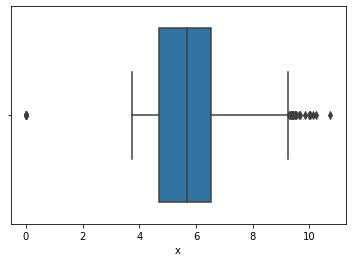

In [6]:
sn.boxplot(x="x",data=df)


<AxesSubplot:xlabel='y'>

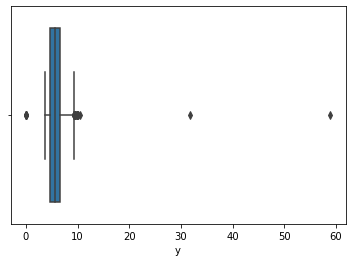

In [7]:
sn.boxplot(x="y",data=df)

<AxesSubplot:xlabel='z'>

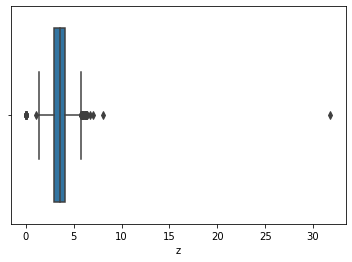

In [8]:
sn.boxplot(x="z",data=df)

In [9]:

# In x,y,z features ther are some outliers and also some data points are at zero so we have to remove them 

df=df.drop(df[df['x']==0].index)
df=df.drop(df[df['y']==0].index)
df=df.drop(df[df['z']==0].index)

In [10]:
df.shape

(53920, 10)

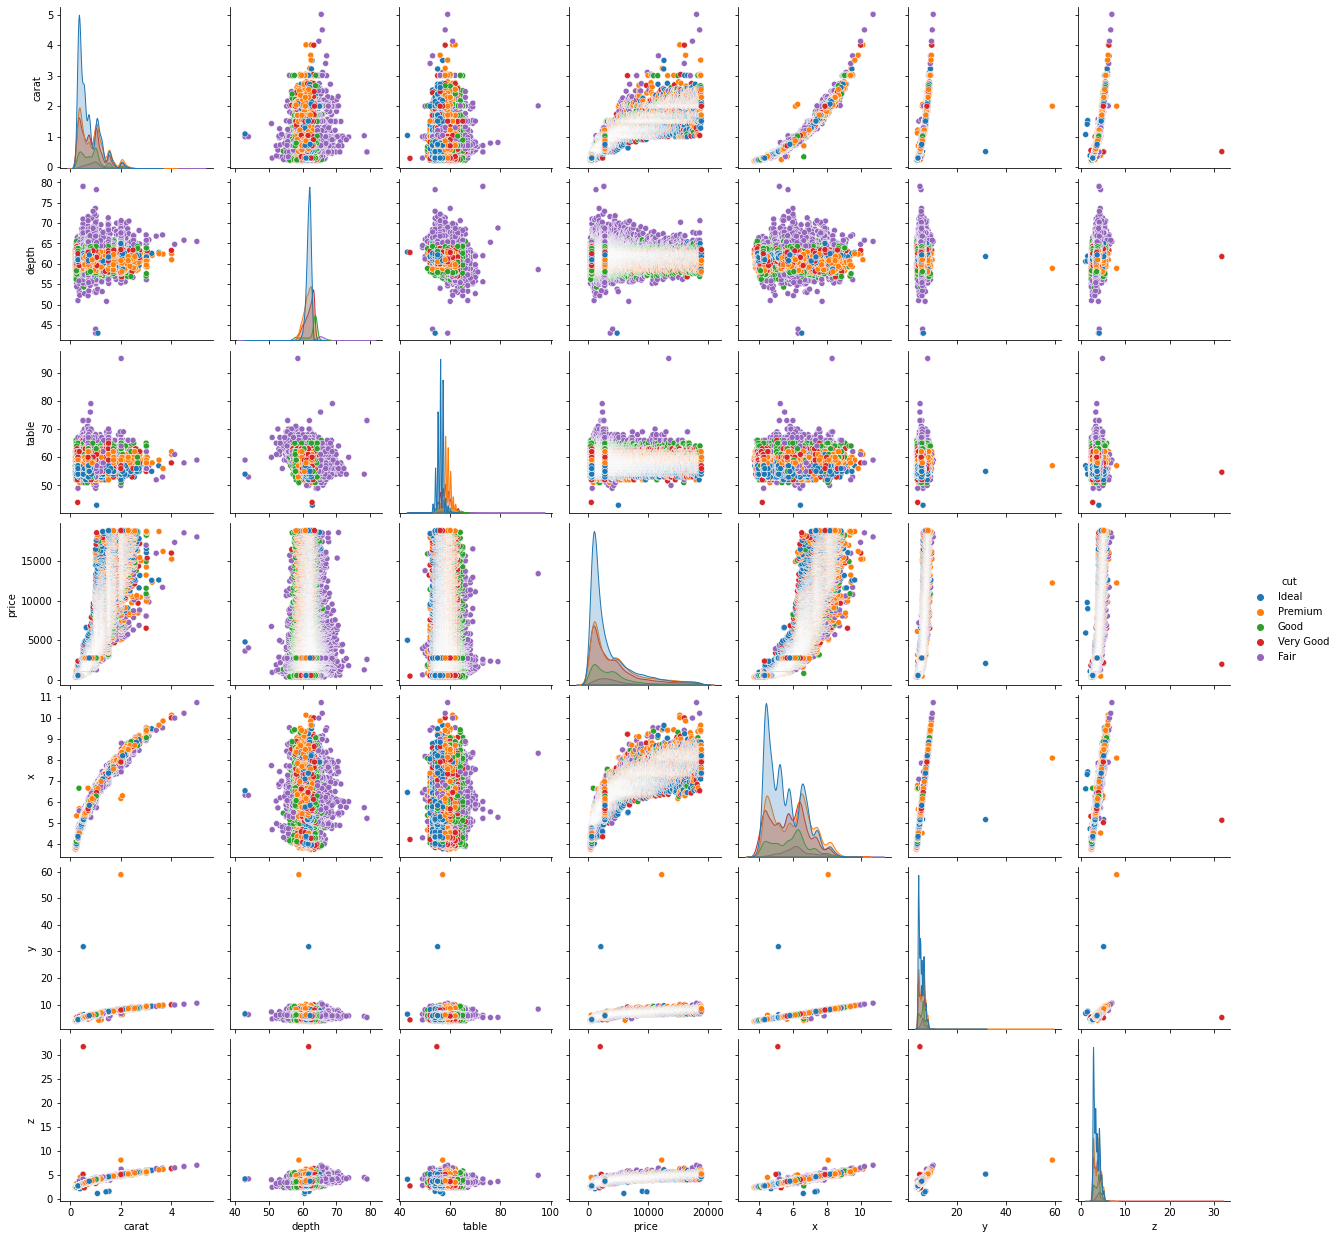

In [11]:
sn.pairplot(df,hue="cut")

<AxesSubplot:xlabel='z'>

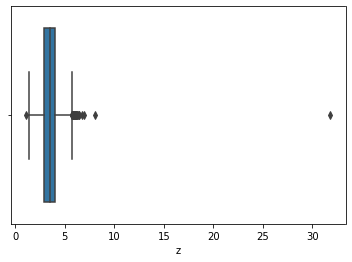

In [12]:
sn.boxplot(x="z",data=df)

We have remove all the outliers from x y z columns

<AxesSubplot:xlabel='cut', ylabel='price'>

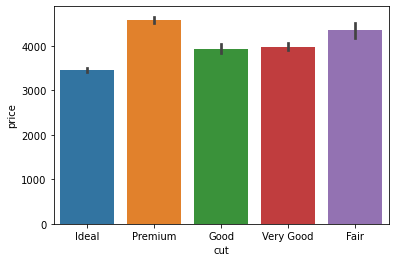

In [13]:
sn.barplot(x="cut",y="price",data=df)

It is clear that premium cut diamond is most expensive and ideal cut is most cheaper in price


<AxesSubplot:xlabel='color', ylabel='price'>

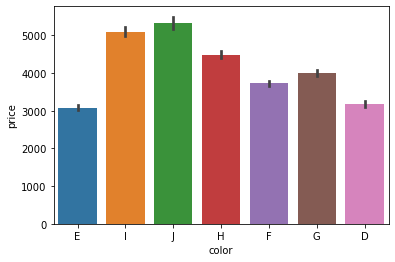

In [14]:
sn.barplot(x="color",y="price",data=df)

It is clear that j color diamond is very expensive compared to E color


<AxesSubplot:xlabel='clarity', ylabel='price'>

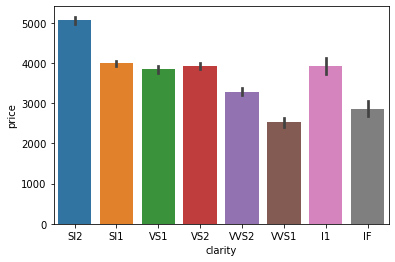

In [15]:
sn.barplot(x="clarity",y="price",data=df)

We can sea s12 clarity diamond are most expensive

<AxesSubplot:xlabel='table', ylabel='Count'>

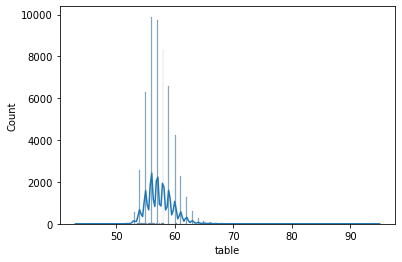

In [16]:
sn.histplot(x="table",data=df,kde=True)

<AxesSubplot:xlabel='table'>

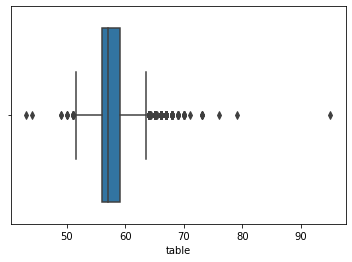

In [17]:
sn.boxplot(x="table",data=df)

In [18]:
q1 = df['table'].quantile(0.25)
q3 = df['table'].quantile(0.75)
print(q1,q3)

56.0 59.0


In [19]:
iq =q3-q1
iq

3.0

In [20]:
df = df[(df["table"]<63.5)&(df["table"]>51.5)]

<AxesSubplot:xlabel='table'>

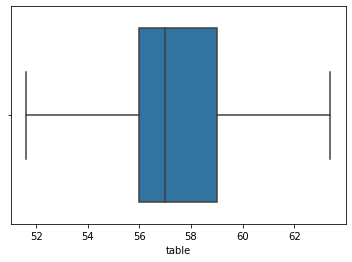

In [23]:
sn.boxplot(x="table",data=df)

We remove outliers from table coulms also


<AxesSubplot:xlabel='depth'>

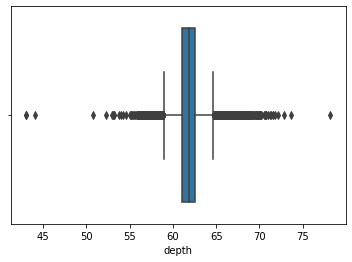

In [24]:
sn.boxplot(x="depth",data=df)

In [25]:
q1_d = df['depth'].quantile(0.25)
q3_d = df['depth'].quantile(0.75)
print(q1_d,q3_d)
iqr_d=q3_d-q1_d
upper = q3_d+ 1.5 * iqr_d
lower = q1_d - 1.5 * iqr_d
print(upper,lower)


61.1 62.5
64.6 59.0


In [26]:
df = df[(df["depth"]<64.6)&(df["depth"]>59)]

<AxesSubplot:xlabel='depth'>

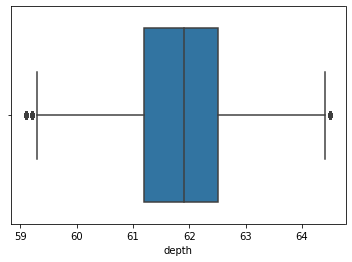

In [27]:
sn.boxplot(x="depth",data=df)

<AxesSubplot:xlabel='carat'>

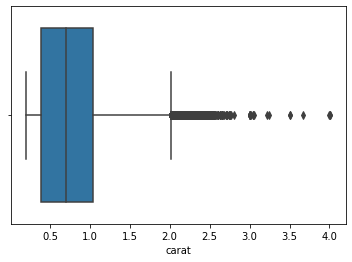

In [28]:
sn.boxplot(x="carat",data=df)

# Step - 3: Handle Categorical Columns


In [29]:

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['color']= label_encoder.fit_transform(df['color'])
df['cut']= label_encoder.fit_transform(df['cut'])
df['clarity']= label_encoder.fit_transform(df['clarity'])

In [30]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:>

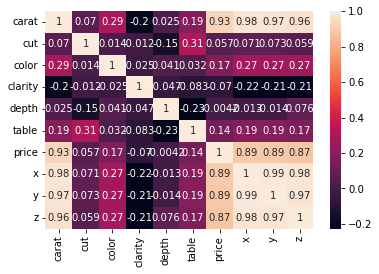

In [31]:
correrlation= df.corr()
sn.heatmap(correrlation,annot=True)

We can see that price has maximum correlation with carat,x,y,z and the leat correlation is with clarity,depta


# Step - 4: Normalize the data

In [34]:
from sklearn.preprocessing import StandardScaler
standardized_df = StandardScaler().fit_transform(df)
print(standardized_df.shape)

(50281, 10)


# Step - 5: Split the data - Test and Train

In [35]:
x=df[['carat','cut','color','clarity','depth','table','x', 'y','z']]


In [36]:
y=df['price']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.predict(X_test))

[ 571 1898  844 ... 3144 1847 6022]


In [39]:
# accuracy of model
print(knn.score(X_test, y_test))


0.029910110571951316


In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Linear regression model


In [47]:
lr.fit(X_train,y_train)

y_pred =print(lr.predict(X_test))

[ 549.8682604  1842.7656281  2182.95137096 ... 5081.15184763 2612.02376125
 6896.99852519]


In [48]:
lr.coef_

array([ 1.22313113e+04, -7.96928397e+00, -2.75946464e+02,  2.67924831e+02,
       -1.72431077e+02, -8.54302987e+01, -1.80225223e+03,  2.10182178e+02,
       -2.58759751e+01])

In [49]:
cofficent=pd.DataFrame(lr.coef_,x.columns,columns=['Coeff'])
cofficent

,Coeff
carat,12231.311311
cut,-7.969284
color,-275.946464
clarity,267.924831
depth,-172.431077
table,-85.430299
x,-1802.252234
y,210.182178
z,-25.875975


# Accuracy of model

In [50]:
print(lr.score(X_test, y_test))

0.8915082107978269


In [52]:
from sklearn import metrics

result=lr.predict(X_test)
print("Mean absolute error is ",metrics.mean_absolute_error(y_test,result))


Mean absolute error is  821.1501157336099


In [53]:
print("Mean Squared error is ",metrics.mean_squared_error(y_test,result))


Mean Squared error is  1673445.0543546532


In [54]:
print("Root-mean-square error is ",np.sqrt(metrics.mean_squared_error(y_test,result)))

Root-mean-square error is  1293.6170431602443


# Random forest model

In [55]:
from sklearn.ensemble import RandomForestRegressor

RF= RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
y_pred =print(RF.predict(X_test))

[ 615.74 2068.56 1055.9  ... 4709.67 1993.91 6661.39]


In [60]:
pred_RF=RF.predict(X_test)

In [62]:
r2=metrics.explained_variance_score(y_test,pred_RF)
r2

0.9825774754445965